<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada</h1>
<h2>Greedy</h2>
</center>
</div>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Problema 1: Retornar el canvi
Escriu un algorisme que, donat un preu $X$ i un pagament $P$, en euros, ens retorni el canvi. És a dir, quants bitllets i quantes monedes de cada valor cal retornar.<br><br>
Exemple:<br>
A l'executar <b>change(30.75, 40)</b> ha de retornar la llista [(5,1),(2,2),(0.20,1),(0.05,1)] ja que hem de retornar 1 bitllet de 5 euros, 2 monedes de 2 euros, 1 moneda de 20 cèntims i 1 moneda de 5 cèntims.

In [2]:
from collections import defaultdict

def change(X, P, coins = [.01, .02, .05, .1, .2, .5, 1, 2, 5, 10, 20, 50, 100, 200, 500]):
    """
    Soluciona el problema de retornar el canvi.
    
    Params
    ======
    :X: Preu 
    :P: Pagament. Ha de ser superior o igual a X.
    :coins: Llista de monedes o bitllets de la moneda que estiguem considerant. Per defecte, euros.
    
    Returns
    =======
    :lst: Llista de monedes o bitllets i la quantitat de cada un d'ells amb el format següent. lst = [(value, quantity)] on:
        :value: és un valor existent dins la llista 'coins'
        :quantity: és el nombre de monedes/bitllets amb valor 'value'.
    
    """
    # Calculem el canvi
    v = P-X
    
    # Aquí guardarem la solució del problema com a diccionari. La clau serà la moneda/bitllet i el valor serà la quantitat.
    solution = defaultdict(int)
    
    # Agafem la 'moneda' més gran, en aquest cas el bitllet de 500.
    n = len(coins) - 1 
    
    # Comprovem si hem acabat, és a dir, si el valor que ens queda és inferior a la moneda més petita, l'algorisme acaba.
    while v >= coins[0]:
        
        # Comprovem si podem pagar amb aquesta moneda. Si no podem, agafem la moneda següent.
        while coins[n] > v:
            n -= 1
                        
        # Afegim a la solució
        solution[coins[n]] += 1
        
        # Modifiquem el valor que ens falta per retornar. Afegim el round a dos decimals per a que no doni problemes amb algunes operacions.
        v = round(v - coins[n], 2)
        
    # Imprimim amb el format que es demana
    lst = list(solution.items())
    return lst

In [3]:
change(30.75, 40) # Retorna: [(5, 1), (2, 2), (0.2, 1), (0.05, 1)]

[(5, 1), (2, 2), (0.2, 1), (0.05, 1)]

In [4]:
# És òptim aquest algorisme?
change(4, 10, coins=[1,3,4])

[(4, 1), (1, 2)]

# Problema 2: Selecció d'activitats
Donat un conjunt d'activitats amb la seva hora d'inici i la seva hora de finalització, trobar quin és el nombre màxim d'activitats que es pot realitzar suposant que només podem fer una activitat alhora.

In [5]:
def task_selection(activities):
    """
    Retorna les activitats que és possible realitzar
    
    Params
    ======
    :activities: Llista d'activitats disponibles. Cada parella (x,y) representa l'hora d'inici i de finalització de l'activitat
    
    Returns
    =======
    :act: Activitats que es poden realitzar
    """
    # Ordenar en funció de la hora de finalització 
    activities = sorted(activities, key=lambda x: x[1])
    
    start, end = -1, -1
    act = []
    
    # Iterem per totes les activitats, extraient-ne l'hora d'inici i fi
    for acty in activities:
        (new_start, new_end) = acty
        
        # Si aquesta activitat no entra en conflicte amb l'anterior, la podem fer
        # En el primer cas, segur que podem fer l'activitat ja que end = -1
        if new_start >= end:
            # modifiquem els valors 
            act.append(acty)
            (start, end) = (new_start, new_end)
    
    return act

In [6]:
activities = [(1, 4), (3, 8), (8, 11), (12, 14), (8, 12), (3, 5), (5, 9), (2, 13), (6, 10), (5, 7), (0, 6)]
task_selection(activities) # Retorna: [(1, 4), (5, 7), (8, 11), (12, 14)]

[(1, 4), (5, 7), (8, 11), (12, 14)]

# Problema 3: Problema de la motxilla

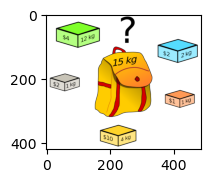

In [26]:
from matplotlib import pyplot as plt
im = plt.imread('img/Knapsack.png')
fig, ax = plt.subplots(figsize=(2, 2))
ax.imshow(im)
plt.show()

Disposem d'una motxilla que té una capacitat màxima de $K$ quilos. Tenim una llista de $n$ elements $E$, on cada element està representat per dos valors: el seu pes, $w$, i el seu valor $v$. És a dir:
        $$E = \{(w_e, v_e),\ \ \ \forall e=1,\dots,n\}$$
Volem maximitzar el valor de la motxilla, omplint-la amb els elements de $E$. Concretament, volem trobar:
        $$\max_A\{A\subset E\ |\ \sum_{a\in A}w_a\leq K \}$$
Implementa un algorisme greedy que trobi una solució al problema. <b>Aquesta solució és òptima?</b>

In [27]:
def knapsack(K, E):
    """
    Implementació del problema de la motxilla.
    
    Params
    ======
    :K: Pes màxim que la motxilla pot carregar
    :E: Elements disponibles representats com una llista de tuples E=[(w,v)] on:
        :w: Pes de l'objecte.
        :v: Valor de l'objecte.
        
    Returns
    =======    
    :selected_elems: La llista dels elements escollits.
    :total_weight: El pes total dels objectes que hem afegit.
    :total_value: El valor total dels objectes que hem afegit.
    """
    # Ordenar en funció de valor/preu 
    ordre = sorted(E, key=lambda x: -(x[1]/x[0]))
    # Aquí guardarem la solució del problema com a diccionari. La clau serà la moneda/bitllet i el valor serà la quantitat.
    solution = defaultdict(int)
    pes = 0
    value = 0
    i = 0 
    while pes < K:
        if ordre[i][0] <= K - pes:
            solution[ordre[i][0]] += 1
            pes += ordre[i][0]
            value += ordre[i][1]
        else:
            if i < len(ordre)-1:
                i += 1
            else:
                break
    
    return list(solution.items()), pes, value

In [28]:
print(knapsack(15, [(12,4), (1,2), (4,10), (1,1), (2,2)]))
print(knapsack(25, [(24,24), (10,18), (10,18), (7,10)]))
print(knapsack(5,  [(3,2),(2,3),(5,6)]))

([(4, 3), (1, 3)], 15, 36)
([(10, 2)], 20, 36)
([(2, 2)], 4, 6)


Ampliació:</b> Modifiqueu la solució per a solucionar dos variacions diferents del problema de la motxilla:

- Variant 1:</b> Considereu que tenim 'infinits' objectes iguals per a qualsevol objecte de la llista E, és a dir, que podeu anar posant un mateix objecte múltiples vegades. <b>L'algorisme és òptim en aquest cas?</b>
- Variant 2:</b> Considereu que podem posar la fracció que vulguem de cada objecte, és a dir, que podem partir un objecte en trossos (disminuint, és clar, el seu pes i el seu valor). <b>L'algorisme és òptim en aquest cas?</b>

-------------RESPOSTA-------------

# Problema 4: Repostatge de vehicles
Hem de fer un trajecte des d’un punt d’origen $S$ i un destí $D$. El dipòsit del cotxe permet recórrer un màxim de $K$ quilòmetres. Es demana trobar el nombre mínim de parades per a fer provisió de carburant durant el trajecte.<br><br>
       
Implementeu un algorisme que, donat $K$ i una llista de distàncies entre l'orígen i les benzineres, on l'últim element de la llista és el destí, retorni el nombre de cops que haurem de parar a repostar.<br><br>
Per exemple, si tenim un cotxe que pot fer 10km sense repostar, el destí està a 30km i tenim benzineres als punts: 8, 14, 16, 18, 23, 27 podem executar:<br><br><center><b>refill(10, [8, 14, 16, 18, 23, 27, 30])</center> 
i ens haurà de retornar tres valors: (True, 3, [8, 18, 27]).

- True/False depenent de si existeix, o no, una solució al problema.
- Nombre de benzineres on hem de fer parada. En cas que no existeixi solució, retornarà el nombre de benzineres que hem visitat abans d'exhaurir el carburant.
- Llista dels quilòmetres que formen part de la solució.

In [29]:
def refill(K, stations):   
    """
    Soluciona el problema de repostatge de vehicles.
    
    Params
    ======
    :K: quilòmetres que pot fer el cotxe amb el dipòsit ple.
    :stations: Punt quilomètric on es troba cada benzinera. L'últim element d'aquesta llista és el destí del trajecte.
    
    Returns
    =======
    :exists_solution: Si existeix o no solució al problema (True/False)
    :num_stops: Nombre de parades que hem de fer.
    :stops: Parades on ens aturarem (punt quilomètric).    
    """
    exists = True    
    stops = []
    distancia = K # variable que indica la distancia a la que podem arribar
    
    while exists:#arranquem i distancia es el km on estem més K
        
        # si la distancia es major que el desti, hem trobat la solució
        if distancia >= stations[-1]:
            break
        
        # trobem a quants punts de parada podem arribar
        x = 0
        for i, element in enumerate(stations[:-1]):
            if element <= distancia:
                x += 1
            else:
                break
        
        # si no troba cap (el primer punt de la llista es major que distancia) NO HI HA SOLUCIÓ
        if x == 0:
            exists = False
            break
            
        # X marca la benzinera mes llunyana, aquesta es en la que hem de parar
        km = stations[x-1]
        stops.append(km)
        distancia = km + K
        
        # eliminem los valors ja passats (greedy) -> reencarem lo problema desde lo punt actual
        del stations[0:x]


    if exists:
        num_stops = len(stops)
        return exists, num_stops, stops
    else:
        num_stops = len(stops)
        return exists, num_stops, stops

In [30]:
print(refill(10, [8, 14, 16, 18, 23, 27, 30]))    # Retorna (True, 3, [8, 18, 27])
print(refill(15, [8, 14, 16, 18, 23, 27, 30]))    # Retorna (True, 2, [14, 27])
print(refill(20, [16, 18, 36, 55, 78, 80, 120]))  # Retorna (False, 3, [18, 36, 55])

(True, 3, [8, 18, 27])
(True, 2, [14, 27])
(False, 3, [18, 36, 55])


# Problema 5: Nombre màxim de $N$ dígits tals que sumin $S$</h1>

Escriu una funció que retorni el nombre més gran possible de $N$ dígits tals que, sumats, tinguin com a valor $S$. En el cas que aquest nombre no existeixi, ha de retornar -1.
Exemple:<br>
A l'executar <b>largest_num(2, 9)</b> ha de retornar 90 ja que és el valor de 2 dígits més gran tals que sumen 9.<br>
A l'executar <b>largest_num(2, 20)</b> ha de retornar -1 ja que no existeix.

In [31]:
def calcul(llista):
    num = 0
    for digito in llista:
        num = num + digito
    return num

def resultat(llista):
    num = 0
    for digito in llista:
        num = num*10 + digito
    return num

def largest_num(N, S):
    """
    Troba el nombre més gran de N dígits amb suma S
    
    Params
    ======
    :N: El nombre de dígits permesos
    :S: La suma dels N dígits
    
    Returns
    =======
    :num: El nombre que satisfà la condició
    """
    valor = []
    
    for i in range(N):
        valor.append(0)
    
    for j in range(N):
        for i in range(9):
            valor[j] += 1
            num = calcul(valor)
            if num == S:
                break
        if num == S:
            break

    if num == S:
        return resultat(valor)
    else:
        return -1

In [32]:
print(str(largest_num(2,9)))   # Retorna 90
print(str(largest_num(3,20)))  # Retorna 992
print(str(largest_num(5,560))) # Retorna -1

90
992
-1


# Problema 6: Cercles inscrits en rectangles

Considera dues seqüències de nombres: $A_1, A_2,\dots,A_N$ i $B_1, B_2,\dots,B_N$. Fent parelles d'aquests elements $(A_i, B_j)$, podem crear rectangles de base $A_i$ i alçada $B_j$ on $0\leq i,j\leq N$.

Escriu una funció que retorni quin és el valor màxim de $S$, definit com la suma de tots els diàmetres dels cercles que es poden inscriure dins dels rectangles.

Apunt:</b> Un cercle està incrit en un rectangle si està totalment contingut a dins i el seu diàmetre és igual a un dels dos costats del rectangle. 
Per exemple:

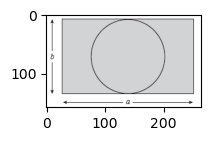

In [33]:
from matplotlib import pyplot as plt
im = plt.imread('img/inscribed.png')
fig, ax = plt.subplots(figsize=(2, 2))
ax.imshow(im)
plt.show()

In [39]:
def inscribed_circles(A, B):
    """
    Fa parelles de bases i alçades tal que maximitzin el valor S, definit com la suma de tots els diàmetres dels cercles que es poden inscriure
    dels rectangles.
    
    Params
    ======
    :A: La llista de les bases dels rectangles
    :B: La llista de les alçades dels rectangles
    
    Returns
    =======
    :S: La suma màxima de tots els diàmetres dels cercles inscrits en els rectangles que es poden construïr agafant un element de A com a base
        i un element de B com a alçada.
    """
def inscribed_circles(A, B):
    S = 0  # Inicializamos la suma de diámetros en cero

    for base in A:
        for height in B:
            diameter = min(base, height)  # Diámetro del círculo inscrito en el rectángulo
            S += diameter  # Agregamos el diámetro a la suma total

    return S

In [40]:
inscribed_circles([8,8,10,12], [15,20,3,5]) # Retorna 30

108